Starting Exploratory Data Analysis...
Data loaded and preprocessed successfully!

1. INITIAL DATA EXPLORATION

--------------------------------------------------
Customers Dataset Summary:
Shape: (200, 4)

First few rows:
  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15

Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    da

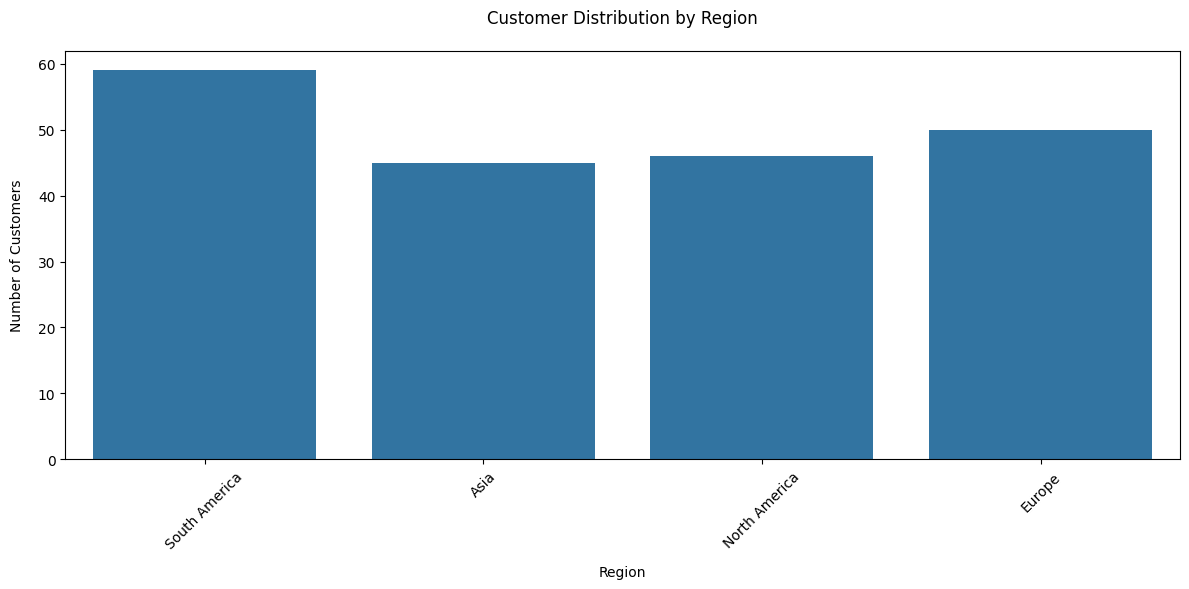

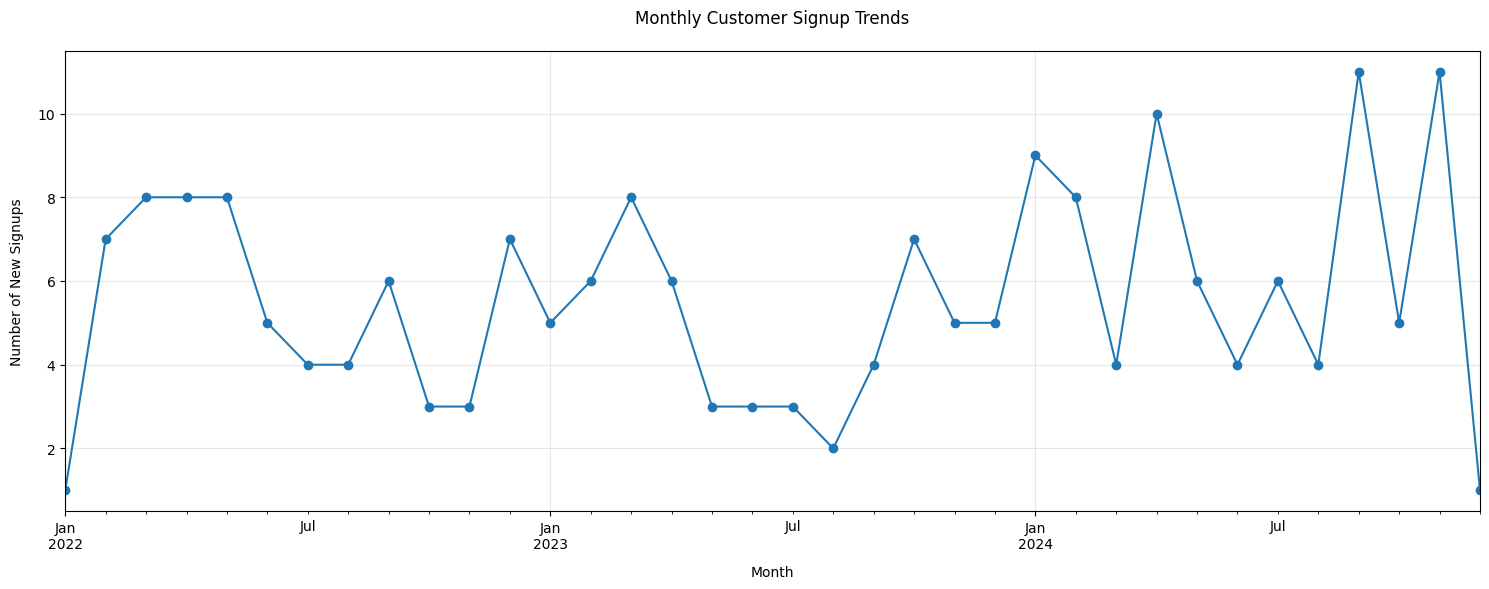

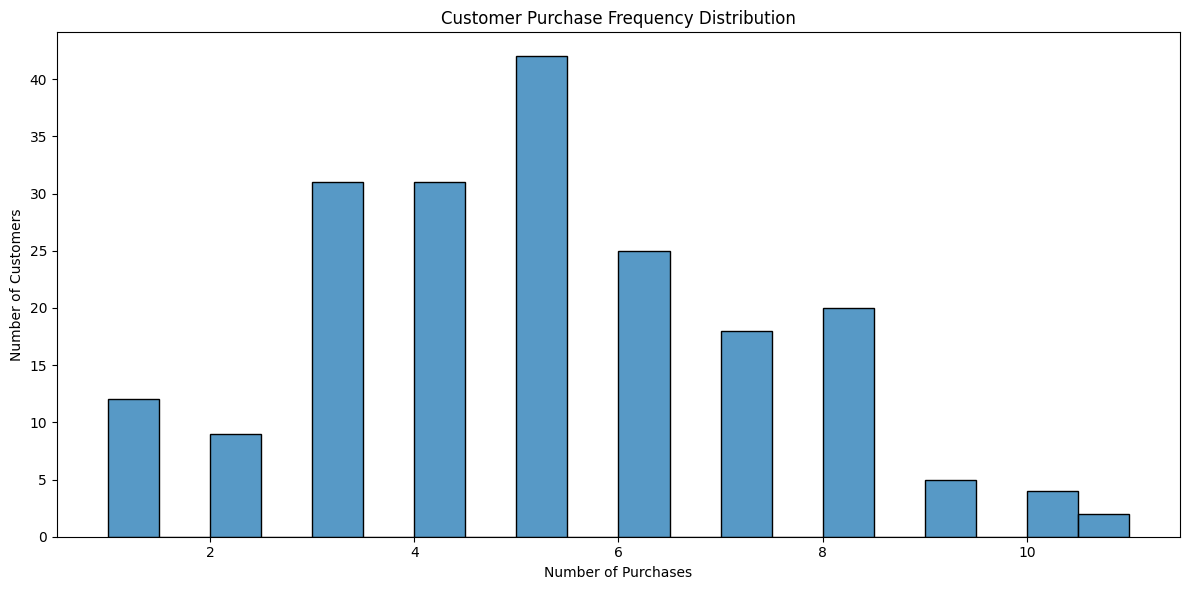


4. PRODUCT ANALYSIS


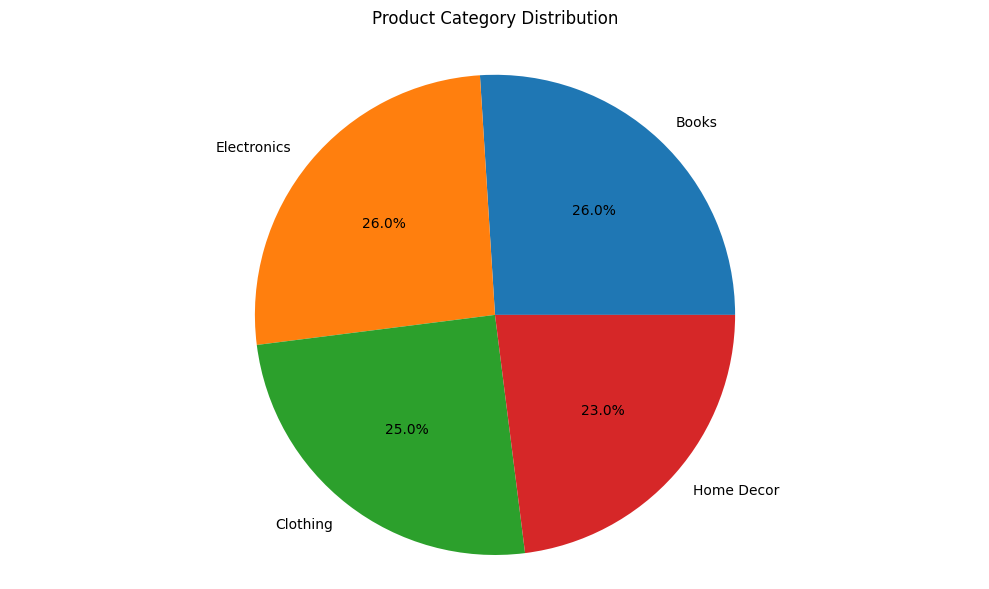

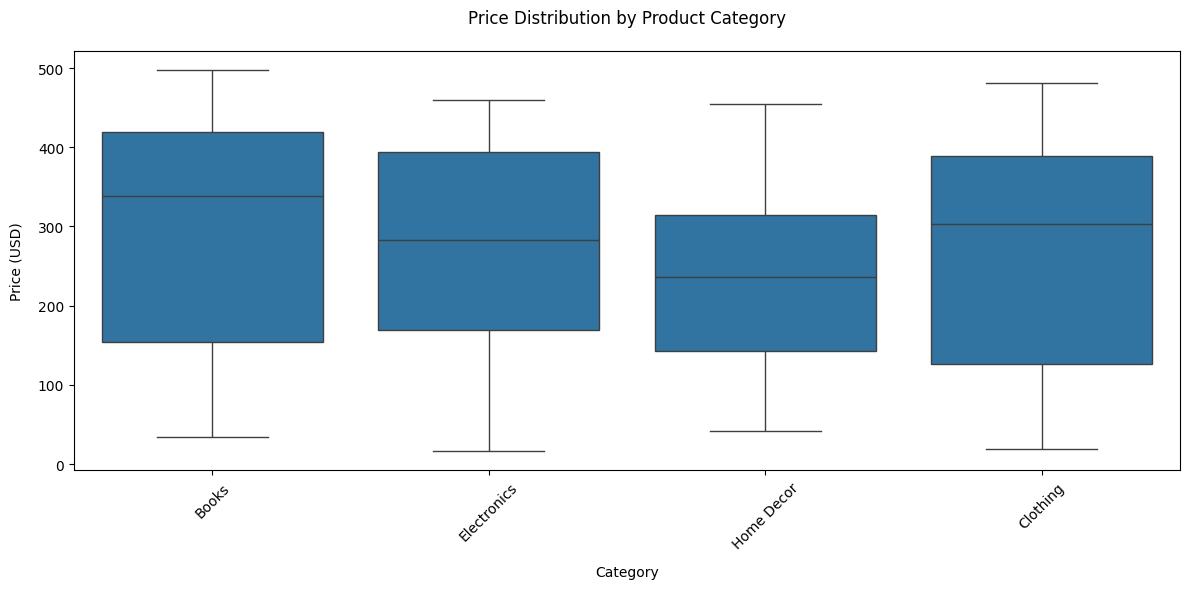


Top 10 Products by Revenue:
           Quantity  TotalValue
ProductID                      
P029             45    19513.80
P079             43    17946.91
P048             43    17905.20
P020             38    15060.92
P062             39    14592.24
P059             46    13947.20
P039             32    13778.88
P083             30    13671.60
P019             35    13487.95
P041             29    13232.12

5. TRANSACTION ANALYSIS


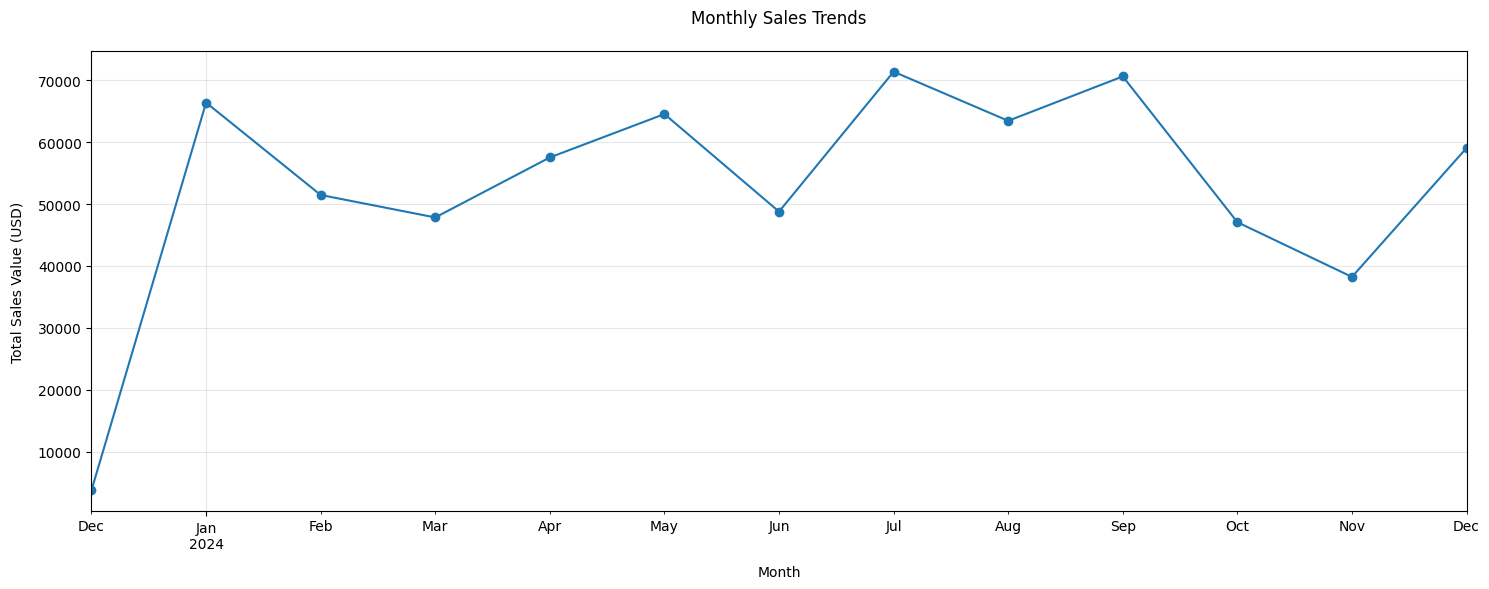

<Figure size 1200x800 with 0 Axes>

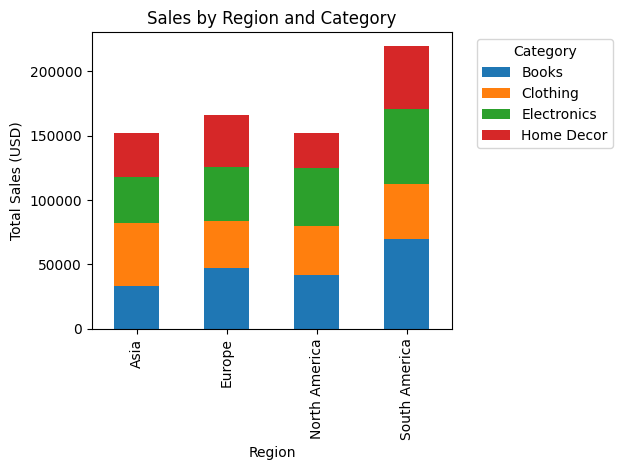


Exploratory Data Analysis Complete!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# For better readability
sns.set_theme(style="whitegrid")
plt.style.use('default')
pd.set_option('display.max_columns', None)

def load_and_preprocess_data():
    """
    Load the datasets and perform initial preprocessing
    Returns: Three dataframes - customers, products, and transactions
    """
    try:
        customers_df = pd.read_csv('Customers.csv')
        products_df = pd.read_csv('Products.csv')
        transactions_df = pd.read_csv('Transactions.csv')

        # Date columns to datetime
        customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

        print("Data loaded and preprocessed successfully!")
        return customers_df, products_df, transactions_df
    except FileNotFoundError:
        print("Error: Please ensure all CSV files are in the correct directory!")
        return None, None, None

def initial_data_exploration(customers_df, products_df, transactions_df):
    """
    Perform initial exploration of the datasets
    """
    print("\n1. INITIAL DATA EXPLORATION")

    for name, df in [("Customers", customers_df),
                    ("Products", products_df),
                    ("Transactions", transactions_df)]:
        print(f"\n{'-'*50}")
        print(f"{name} Dataset Summary:")
        print(f"Shape: {df.shape}")
        print("\nFirst few rows:")
        print(df.head())
        print("\nData Types and Non-null Counts:")
        print(df.info())
        print("\nNumerical Columns Statistics:")
        print(df.describe())

def data_quality_analysis(customers_df, products_df, transactions_df):
    """
    Analyze data quality including missing values, duplicates, and anomalies
    """
    print("\n2. DATA QUALITY ANALYSIS")

    # Check for missing values
    print("\nMissing Values Summary:")
    for name, df in [("Customers", customers_df),
                    ("Products", products_df),
                    ("Transactions", transactions_df)]:
        missing = df.isnull().sum()
        if missing.any():
            print(f"\n{name} Dataset Missing Values:")
            print(missing[missing > 0])
        else:
            print(f"\n{name} Dataset: No missing values")

    # Check for duplicates
    print("\nDuplicate Records Check:")
    for name, df in [("Customers", customers_df),
                    ("Products", products_df),
                    ("Transactions", transactions_df)]:
        duplicates = df.duplicated().sum()
        print(f"{name}: {duplicates} duplicate rows")

    # Check for anomalies in numerical columns
    print("\nNumerical Anomalies Check:")
    print("\nProducts Price Range:", products_df['Price'].describe())
    print("\nTransactions Value Range:", transactions_df['TotalValue'].describe())

def customer_analysis(customers_df, transactions_df):
    """
    Analyze customer demographics and behavior
    """
    print("\n3. CUSTOMER ANALYSIS")

    # Regional distribution
    plt.figure(figsize=(12, 6))
    sns.countplot(data=customers_df, x='Region')
    plt.title('Customer Distribution by Region', pad=20)
    plt.xlabel('Region', labelpad=10)
    plt.ylabel('Number of Customers', labelpad=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Customer signup trends
    customers_df['SignupMonth'] = customers_df['SignupDate'].dt.to_period('M')
    monthly_signups = customers_df.groupby('SignupMonth').size()

    plt.figure(figsize=(15, 6))
    monthly_signups.plot(kind='line', marker='o')
    plt.title('Monthly Customer Signup Trends', pad=20)
    plt.xlabel('Month', labelpad=10)
    plt.ylabel('Number of New Signups', labelpad=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Customer purchase frequency
    customer_frequency = transactions_df.groupby('CustomerID').size().reset_index(name='purchase_count')
    plt.figure(figsize=(12, 6))
    sns.histplot(data=customer_frequency, x='purchase_count', bins=20)
    plt.title('Customer Purchase Frequency Distribution')
    plt.xlabel('Number of Purchases')
    plt.ylabel('Number of Customers')
    plt.tight_layout()
    plt.show()

def product_analysis(products_df, transactions_df):
    """
    Analyze product categories, pricing, and performance
    """
    print("\n4. PRODUCT ANALYSIS")

    # Product category distribution
    plt.figure(figsize=(10, 6))
    category_counts = products_df['Category'].value_counts()
    plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
    plt.title('Product Category Distribution', pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

    # Price distribution by category
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=products_df, x='Category', y='Price')
    plt.title('Price Distribution by Product Category', pad=20)
    plt.xlabel('Category', labelpad=10)
    plt.ylabel('Price (USD)', labelpad=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Top selling products
    product_sales = transactions_df.groupby('ProductID').agg({
        'Quantity': 'sum',
        'TotalValue': 'sum'
    }).sort_values('TotalValue', ascending=False).head(10)
    print("\nTop 10 Products by Revenue:")
    print(product_sales)

def transaction_analysis(transactions_df, customers_df, products_df):
    """
    Analyze transaction patterns and sales trends
    """
    print("\n5. TRANSACTION ANALYSIS")

    # Merge datasets
    merged_df = transactions_df.merge(customers_df, on='CustomerID')\
                             .merge(products_df, on='ProductID')

    # Monthly sales trends
    merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
    monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum()

    plt.figure(figsize=(15, 6))
    monthly_sales.plot(kind='line', marker='o')
    plt.title('Monthly Sales Trends', pad=20)
    plt.xlabel('Month', labelpad=10)
    plt.ylabel('Total Sales Value (USD)', labelpad=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Sales by region and category
    regional_category_sales = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
    plt.figure(figsize=(12, 8))
    regional_category_sales.plot(kind='bar', stacked=True)
    plt.title('Sales by Region and Category')
    plt.xlabel('Region')
    plt.ylabel('Total Sales (USD)')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

def main():
    """
    Execute the complete EDA process
    """
    print("Starting Exploratory Data Analysis...")

    # Load and preprocess data
    customers_df, products_df, transactions_df = load_and_preprocess_data()

    if customers_df is not None:
        initial_data_exploration(customers_df, products_df, transactions_df)
        data_quality_analysis(customers_df, products_df, transactions_df)
        customer_analysis(customers_df, transactions_df)
        product_analysis(products_df, transactions_df)
        transaction_analysis(transactions_df, customers_df, products_df)

        print("\nExploratory Data Analysis Complete!")
    else:
        print("Analysis cannot proceed without data. Please check your file paths.")

if __name__ == "__main__":
    main()